### 半监督学习

#### 1. 未标记样本

我们有训练样本集$D_l=\{(\mathbf{x}_1,y_1),(\mathbf{x}_2,y_2),\cdots,(\mathbf{x}_l,y_l)\}$，这$l$个样本的类别标记已知，称为“有标记”样本；此外，还有$D_u=\{\mathbf{x}_{l+1},\mathbf{x}_{l+2},\cdots,\mathbf{x}_{l+u}\}, l \ll u$，这$u$个样本的类别标记未知，称为“未标记”样本。若直接使用传统监督学习技术，则仅有$D_l$能用于构建模型，$D_u$所包含的信息被浪费了；另一方面，若$D_l$较小，则由于训练样本不足，学得模型的泛化能力往往不佳。那么，能否在构建模型的过程中将$D_u$利用起来呢？

一个简单的做法，是将$D_u$中标记的示例全部标记后用于学习。这种方法需要将所有的未标记的样本基于领域知识进行标记，显然是一种很费时费力的事情。那有没有更好的办法呢？

我们可以用$D_l$先训练一个模型，拿这个模型去测试每个为标记的样本，然后确定是否是这个预测值，将预测正确的值加入到训练样本中，重新训练模型，如此反复，这样也能训练出比较强的模型，大幅度降低了标记成本。这样的学习方式称为“主动学习”，其目标是使用尽量少的“查询”来获得尽量好的性能。

显然，主动学习引入了额外的专家知识，通过与外界的交互来讲部分未标记样本转变为有标记样本，若不与专家交互，没有获得额外信息，还能利用未标记样本来提高泛化性能吗？

事实上，未标记样本虽未直接标记信息，但若它们与有标记样本是从同样的数据源独立同分布采样而来，则它们所包含的关于数据分布的信息对建立模型将大有裨益。如图所示，若仅有基于图中的一个正例和一个范例，则由于待判别样本恰位于两者正中间，大体上只能随机猜测；若能观察到图中的未标记样本，则将很有把握地判别为正例。

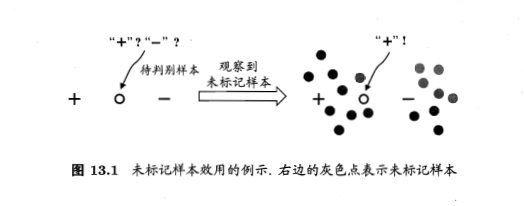

让学习器不依赖外界交互、自动地利用未标记样本来提升学习性能，就是半监督学习。要利用未标记样本，必然要做一些将未标记样本所揭示的数据分布信息与类别标记相联系的假设。最常见的是“聚类假设”，即假设数据存在簇结构，同一个簇的样本属于同一个类别。上图中就是基于聚类假设来利用未标记样本，由于待预测样本与正例样本通过未标记样本的“撮合”聚在一起，与相对分离的反例样本相比，待判别样本更可能属于正类。半监督学习中另一种常见的假设是“流形假设”，即假设数据分布在一个流形结构上，邻近的样本拥有相似的输出值。“邻近”程度常用“相似”程度来刻画，因此，流形假设可看做聚类假设的推广（对相似簇结构的定量衡量），但流形假设对输出值没有限制，因此比聚类假设的适用范围更广，可用于更多类型额学习任务。事实上，无论聚类假设还是流形假设，其本质都是“相似的样本拥有相似的输出”这个基本假设。

半监督学习可进一步划分为纯半监督学习和直推学习。前者假定训练数据中的未标记样本并非待预测的数据，而后者则假定学习过程中所考虑的未标记样本恰是待预测数据，学习的目的就是这些未标记样本上获得最优泛化性能。换言之，纯半监督学习是基于“开方世界”假设，希望学得模型能适用于训练过程中未观察到的数据；而直推学习是基于“封闭世界”假设，仅视图对学习过程中观察到的未标记数据进行预测。

#### 2. 生成式方法

生成式方法是直接基于生成式模型的方法。此类方法假设所有数据（无论是否有标记）都是由同一个潜在的模型“生成”的。这个假设使得我们能通过潜在模型的参数将未标记数据与学习目标联系起来，而未标记数据的标记则可看作模型的缺失参数，通常可基于EM算法进行极大似然估计求解，此类方法的区别在于生成模型的假设，不同的模型假设将产生不同的方法。

给定样本$\mathbf{x}$，其真实类别标记为$y∈\mathcal{Y}$，其中$\mathcal{Y}=\{1,2,\cdots,N\}$为所有可能的类别。假设样本由高斯混合模型生成，且每个类别对应一个高斯混合成分。换言之，数据样本是基于如下概率密度生成：

$$p(\mathbf{x})=\sum_{i=1}^N\alpha_i \cdot p(\mathbf{x} \mid \mu_i, \Sigma_i)$$

其中，混合系数$\alpha_i \ge 0, \sum_{i=1}^N\alpha_i=1; p(\mathbf{x} \mid \mu_i,\Sigma_i)$是样本$\mathbf{x}$属于第$i$个高斯混合成分的概率；$\mu_i$和$\Sigma_i$为该高斯混合成分的参数。

令$f(x)∈\mathcal{Y}$表示模型$f$对$\mathbf{x}$的预测标记，$\Theta∈\{1,2,\cdot,N\}$表示样本$\mathbf{x}$隶属于的高斯混合成分。由最大化后验概率可知

$$\begin{align*}
f(x) &= \arg\max_{j∈\mathcal{Y}}p(y=j\mid\mathbf{x}) \\
&= \arg\max_{j∈\mathcal{Y}}\sum_{i=1}^Np(y=j,\Theta=i\mid\mathbf{x}) \\
&= \arg\max_{j∈\mathcal{Y}}\sum_{i=1}^Np(y=j \mid \Theta=i,\mathbf{x}) \cdot p(\Theta=i \mid \mathbf{x})
\end{align*}$$

其中

$$p(\Theta=i \mid \mathbf{x}) = \frac{\alpha_i \cdot p(\mathbf{x} \mid p(\mu_i, \Sigma_i))}{\sum_{i=1}^N\alpha_i \cdot p(\mathbf{x} \mid \mu_i, \Sigma_i)}$$

为样本$\mathbf{x}$由第$i$个高斯混合成分生成的后验概率，$p(y=j \mid \Theta=i, \mathbf{x})$为$\mathbf{x}$由第$i$个高斯混合成分生成且其类别为$j$的概率。由于假设每个类别对应一个高斯混合成分，因此$p(y=j\mid\Theta=i,\mathbf{x})$仅与样本$\mathbf{x}$所属的高斯混合成分$\Theta$有关，可用$p(y=j\mid\Theta=i)$代替。不失一般性，假定第$i$个类别对应于第$i$个高斯混合成分，即$p(y=j \mid \Theta=i)=1$当且仅当$i=j$，否则$p(y=j \mid \Theta=i)=0$。

不难发现，式中估计$p(y=j \mid \Theta=i,\mathbf{x})$需知道样本的标记，因此仅能使用有标记数据；而$p(\Theta=i \mid \mathbf{x})$不涉及样本标记，因此有标记和未标记数据均可利用，通过引入大量的未标记数据，对这一项的估计可望由于数据量的增长而更为准确，于是整体的估计可能会更准确。由此可清楚地看出未标记数据何以能辅助提高分类模型的性能。

给定有标记样本集$D_l=\{(\mathbf{x}_1,y_1),(\mathbf{x}_2,y_2),\cdot,(\mathbf{x}_l,y_l)\}$和未标记样本集$D_u=\{\mathbf{x}_{l+1},\mathbf{x}_{l+1},\cdots,\mathbf{x}_{l+u},\}, l \ll u, l+u=m$。假设所有样本独立同分布，且都是由同一个高斯混合模型而成的。用极大似然估计估计高斯混合模型的参数$\{(\alpha_i,\mu_i,\Sigma_i)\mid 1 \le i \le N\}, D_l \cup D_u$的对数似然是

$$LL(D_l \cup D_u) = \sum_{(\mathbf{x}_j,y_j) \in D_l}\ln\left(\sum_{i=1}^N\alpha_i \cdot p\bigr(\mathbf{x}_j \mid \mu_i, \Sigma_i\bigr) \cdot p\bigr(y_j \mid \Theta=i,\mathbf{x}_j\bigr)\right) + \sum_{\mathbf{x}_j \in D_u} \ln \left(\sum_{i=1}^N\alpha_i \cdot p\bigr(\mathbf{x}_j \mid \mu_i, \Sigma_i\bigr)\right)$$

上式由两项组成：基于有标记数据$D_l$的有监督项和基于未标记数据$D_u$的无监督项。显然，高斯混合模型参数估计可用EM算法求解，迭代更新式如下：

* E步：根据当前模型参数计算未标记样本$\mathbf{x}_j$属于各高斯混合成分的概率

$$\gamma_{ji}=\frac{\alpha_i \cdot p(\mathbf{x}_j \mid p(\mu_i, \Sigma_i))}{\sum_{i=1}^N\alpha_i \cdot p(\mathbf{x}_j \mid \mu_i, \Sigma_i)}$$

* M步：基于$\gamma_{ji}$更新模型参数，其中$l_i$表示第$i$类的有标记样本数目

$$\mu_i = \frac{1}{\sum_{\mathbf{x}_j \in D_u}\gamma_{ji} + l_i}\left(\sum_{\mathbf{x}_j \in D_u}\gamma_{ji}\mathbf{x}_j + \sum_{(\mathbf{x}_j,y_j) \in D_l\wedge y_j=i}\mathbf{x}_j\right)$$

$$\Sigma_i=\frac{1}{\sum_{\mathbf{x}_j \in D_u}\gamma_{ji}+l_i}\left(\sum_{\mathbf{x}_j \in D_u}\gamma_{ji}(\mathbf{x}_j-\mathbf{\mu}_j)(\mathbf{x}_j-\mathbf{\mu}_j)^T + \sum_{(\mathbf{x}_j,y_j) \in D_l\wedge y_j=i}(\mathbf{x}_j-\mathbf{\mu}_j)(\mathbf{x}_j-\mathbf{\mu}_j)^T\right)$$

$$\alpha_i=\frac{1}{m}\left(\sum_{\mathbf{x}_j \in D_u}\gamma_{ji} + l_i\right)$$

以上过程不断迭代直至收敛，即可获得模型参数。将上述过程中的高斯混合模型换成混合专家模型、朴素贝叶斯模型等即可推导出其他的生成式半监督学习方法。此类方法简单，易于实现，在有标记数据极少的情形下往往比其他方法性能更好，然而，此类方法一个关键：模型假设必须准确，即假设的生成式模型必须与真实数据分布吻合；否则利用未知标记数据翻到会降低泛化性能。遗憾的是，在现实任务中往往很难事先做出准确的模型假设，除非拥有充分可靠的领域知识。

#### 3. 半监督SVM

半监督支持向量机是支持向量机在半监督学习上的推广，在不考虑未标记样本时，支持向量机试图找到最大间隔划分超平面，而在考虑未标记样本后，S3VM试图找到能将两类有标记样本分开，且穿过数据低密度区域的划分超平面，如下图所示，这里的基本假设是“低密度分隔”，显然，这是聚类假设在考虑了线性超平面划分后的推广。

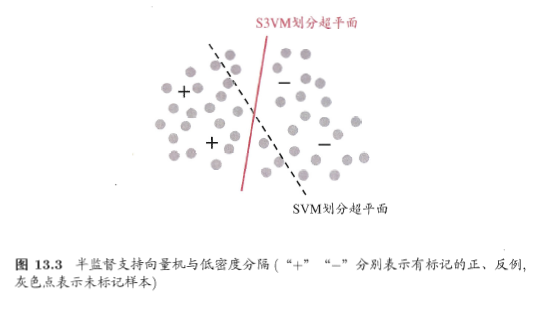

半监督支持向量机中最著名的是TSVM。与标准SVM一样，TSVM也是针对二分类问题的学习方法。TSVM试图考虑对未标记样本进行各种可能的标记指派，即尝试将每个为标记样本分别作为正例或反例，然后再所有这些结果中，寻求一个在所有样本（包括有标记样本和进行了标记指派的未标记样本）上间隔最大化的划分超平面。一旦划分超平面得以确定，未标记样本的最终标记指派就是其预测结果。

形式化地说，给定$D_l=\{(\mathbf{x}_1,y_1),(\mathbf{x}_2,y_2),\cdots,(\mathbf{x}_l,y_l)\}$和$D_u=\{\mathbf{x}_{l+1},\mathbf{x}_{l+2},\cdots,\mathbf{x}_{l+u}\}$，其中$y_i \in \{-1,+1\}, l \ll u, l+u=m$。TSVM的学习目标是为$D_u$中的样本给出预测标记$\hat{\mathbf{y}}=(\hat{y}_{l+1},\hat{y}_{l+2},\cdots,\hat{y}_{l+u}),\hat{y}_i \in \{-1,+1\}$，使得

$$\begin{align*}
\min_{\mathbf{w},b,\hat{\mathbf{y}},\mathbf{\xi}} &\frac{1}{2}\|w\|_2^2 + C_l\sum_{i=1}^l\xi_i + C_u\sum_{i=l+1}^m\xi_i \\
s.t. &y_i(\mathbf{w}^Tx_i+b) \ge 1-\xi_i, i=1,2,\cdots,l \\
&\hat{y}_i(\mathbf{w}^Tx_i+b) \ge 1-\xi_i, i=l+1,l+2,\cdots,m \\
&\xi_l \ge 0, i=1,2,\cdots,m
\end{align*}$$

其中，$(\mathbf{w},b)$确定了一个划分超平面；$\xi$为松弛向量，$\xi(i=1,2,\cdots,l)$对应于有标记样本，$\xi_i(i=l+1,l+2,\cdots,m)$对应于未标记样本；$C_l$和$C_u$是由用户指定的用于平衡模型复杂度、有标记样本与未标记样本重要程度的折中参数。

显然，尝试未标记样本的各种标记指派是一个穷举过程，仅当未标记样本很少时才有可能直接求解。在一般情形下，必须考虑更高效的优化策略。

TSVM采用局部搜索来迭代地寻找上式的近似解。具体来说，它先利用有标记样本学得一个SVM，即忽略式子中涉及$C_u$与$\hat{\mathbf{y}}$的项及约束。然后，利用这个SVM对未标记数据进行标记指派，即将SVM预测的结果作为“伪标记”赋予未标记样本。此时$\hat{\mathbf{y}}$成为已知，将其代入式子中即得到一个标准的SVM问题，于是可求解出新的划分超平面和松弛向量；注意到此时未标记样本的伪标记很可能不准确，因此$C_u$要设置为比$C_l$小的值，使其标记样本所起作用更大。接下来，TSVM找出两个标记指派为异类且很可能发生错误的未标记样本，交换它们的标记，再重新基于上式求解出更新后的划分超平面和松弛向量，然后再找出两个标记指派为异类且很有可能发生错误的未标记样本，......，标记指派调整完成后，逐渐增大$C_u$以提高未标记样本对优化目标的影响，进行下一轮标记指派调整，直至$C_u=C_l$为止。此时求解得到的SVM不仅给未标记样本提供了标记，还能对训练过程中未见的示例进行预测。TSVM的算法描述如下图所示。

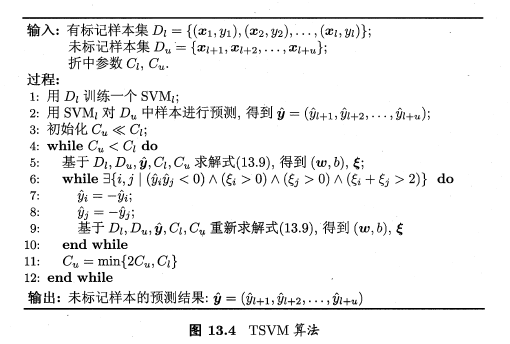

在对未标记样本进行标记指派及调整的过程中，有可能出现类别不平衡问题，即某类的样本远多于另一类，这将对SVM的训练过程造成困扰。为了减轻类别不平衡性所造成的不利影响，可对图中的算法稍加改进：将优化目标中的$C_u$项拆分为$C_u^+$与$C_u^-$两项，分别对应基于伪标记而当做正、反例使用的未标记样本，并在初始化时令

$$C_u^+ = \frac{u_-}{u_+}C_u^-$$

其中$u_+$和$u_-$为基于伪标记而当做正、反例使用的未标记样本数。

在上图中，若存在一对未标记样本$\mathbf{x}_i$与$\mathbf{x}_j$，其标记指派$\hat{\mathbf{y}}_i$和$\hat{\mathbf{y}}_j$不同，且对应的松弛变量满足$\xi_i + \xi_j > 2$，则意味着$\hat{\mathbf{y}}_i$和$\hat{\mathbf{y}}_j$很可能是错误的。需对二者进行交换后重新求解式，这样每轮迭代后均可使式的目标函数值下降。

显然，搜寻标记指派可能出错的每一对未标记样本进行调整，是一个涉及巨大计算开销的大规模优化问题。因此，半监督SVM研究的一个重点是如何设计出高效的优化求解策略，由此发展处很多方法，如基于图核函数梯度下降的LDS、基于标记均值估计的meanS3VM等。

#### 4. 图半监督学习

给定一个数据集，我们可将其映射为一个图，数据集中每个样本对应于图中一个节点，若两个样本之间的相似度很高（或相关性很强），则对应的节点之间存在一条边，边的“强度”正比于样本之间的相似度（或相关性）。我们可将有标记样本所对应的节点想象为染过色，而未标记样本所对应的节点尚未染色。于是，半监督学习就对应于“颜色”在图上扩散或传播的过程，由于一个图对应了一个矩阵，这就使得我们能基于矩阵运算来进行半监督学习算法的推导与分析。

给定$D_l=\{(\mathbf{x}_1,y_1),(\mathbf{x}_2,y_2),\cdots,(\mathbf{x}_l,y_l)\}$和$D_u=\{\mathbf{x}_{l+1},\mathbf{x}_{l+2},\cdots,\mathbf{x}_{l+u}\}, l \ll u, l+u=m$。我们先基于$D_l \cup D_u$构建一个图$G=(V,E)$，其中节集$V=(\mathbf{x}_1,\cdots,\mathbf{x}_l,\mathbf{x}_{1+1},\cdots,\mathbf{x}_{1+u})$，边集$E$可表示为一个亲和矩阵，常基于高斯函数定义为

$$(\mathbf{W})_{ij}=
\begin{cases}
\text{exp}\bigr(\frac{-\|x_i-x_j\|_2^2}{2\sigma^2}\bigr) & \text{if} \hspace{0.2cm} i ≠ j \\
0 & \text{otherwise}
\end{cases}$$

其中$i,j \in {1,2,\cdots,m}, \sigma > 0$是用户指定的高斯函数带宽参数。

假定从图$G=(V,E)$将学得一个实质函数$f:V \to \mathbb{R}$，其对应的分类规则为：$y_i=\text{sign}(f(\mathbf{x}_i)),y_i \in (-1,+1)$。直观上看，相似的样本应具有相似的标记，于是可定义关于$f$的"能量函数"：

$$\begin{align*}
E(f) &= \frac{1}{2}\sum_{i=1}^m\sum_{j=1}^m(\mathbf{W})_{ij}(f(\mathbf{x}_i)-f(\mathbf{x}_j))^2 \\
&= \frac{1}{2}\left(\sum_{i=1}^md_if(\mathbf{x}_i^2 + \sum_{j=1}^md_jf(\mathbf{x}_j^2) - 2\sum_{i=1}^m\sum_{j=1}^m(\mathbf{W})_{ij}(f(\mathbf{x}_i)-f(\mathbf{x}_j))\right) \\
&= \sum_{i=1}^md_if(\mathbf{x})_i^2 - \sum_{i=1}^m\sum_{j=1}^m(\mathbf{W})_{ij}(f(\mathbf{x}_i)-f(\mathbf{x}_j) \\
&= \mathbf{f}^T(\mathbf{D-W})\mathbf{f}
\end{align*}$$

其中$\mathbf{f}=(\mathbf{f}_l^T, \mathbf{f}_u^T), \mathbf{f}_l = (f(\mathbf{x})_1;f(\mathbf{x})_2;\cdots,f(\mathbf{x})_l),f_u=(f(\mathbf{x})_{l+1};f(\mathbf{x})_{l+2};\cdots,f(\mathbf{x})_{l+u})$分别为函数$f$在有标记样本与未标记样本上的预测结果，$\mathbf{D}=\text{diag}(d_1,d_2,\cdots,d_{l+u})$是一个对角矩阵，其对角元素$d_i=\sum_{j=1}^{l+u}(\mathbf{W}_{ij})$为矩阵$\mathbf{W}$的第$i$行元素之和。

具有最小能量的函数$f$在有标记样本上满足$f(x_i)=y_i(i=1,2,\cdots,l)$；在未标记样本上满足$\Delta \mathbf{f}=0$，其中$\mathbf{\Delta}=\mathbf{D-W}$为拉普拉斯矩阵。以第$l$行与第$l$列为界，采用分块矩阵表示方式：$\mathbf{W}=\begin{bmatrix}
\mathbf{W}_{ll} & \mathbf{W}_{lu} \\
\mathbf{W}_{ul} & \mathbf{W}_{uu}
\end{bmatrix}$，$\mathbf{D}=\begin{bmatrix}
\mathbf{D}_{ll} & \mathbf{0}_{lu} \\
\mathbf{0}_{ul} & \mathbf{D}_{uu}
\end{bmatrix}$，则上式可重写为
$$\begin{align*}
E(f)&=(f_l^T,f_u^T)\left(\mathbf{D}=\begin{bmatrix}
\mathbf{D}_{ll} & \mathbf{0}_{lu} \\
\mathbf{0}_{ul} & \mathbf{D}_{uu}
\end{bmatrix} - \mathbf{W}=\begin{bmatrix}
\mathbf{W}_{ll} & \mathbf{W}_{lu} \\
\mathbf{W}_{ul} & \mathbf{W}_{uu}
\end{bmatrix}\right)
\begin{bmatrix}
\mathbf{f}_l \\
\mathbf{f}_u
\end{bmatrix} \\
&= \mathbf{f}_l^T(\mathbf{D}_{ll}-\mathbf{W}_{ll})\mathbf{f}_l - 2\mathbf{f}_u^T\mathbf{W}_{ul}\mathbf{f}_l+\mathbf{f}_u^T(\mathbf{D}_{uu}-\mathbf{W}_{uu})\mathbf{f}_u
\end{align*}$$


由$\frac{\partial E(f)}{\partial \mathbf{f}_u}=\mathbf{0}$可得

$$\mathbf{f}_u=(\mathbf{D}_{uu}-\mathbf{W}_{uu})^{-1}\mathbf{W}_{ul}\mathbf{f}_l$$

令

$$\begin{align*}
\mathbf{P}
&=\mathbf{D}^{-1}\mathbf{W} \\
&=\begin{bmatrix}
\mathbf{D}_{ll}^{-1} & \mathbf{0}_{lu} \\
\mathbf{0}_{ul} & \mathbf{D}_{uu}^{-1}
\end{bmatrix}\begin{bmatrix}
\mathbf{W}_{ll} & \mathbf{W}_{lu} \\
\mathbf{W}_{ul} & \mathbf{W}_{uu}
\end{bmatrix} \\
&=\begin{bmatrix}
\mathbf{D}_{ll}^{-1}\mathbf{W}_{ll} & \mathbf{D}_{ll}^{-1}\mathbf{W}_{lu} \\
\mathbf{D}_{uu}^{-1}\mathbf{W}_{ul} & \mathbf{D}_{uu}^{-1}\mathbf{W}_{uu}
\end{bmatrix}\end{align*}$$

即$\mathbf{P}_{uu}=\mathbf{D}_{uu}^{-1}\mathbf{W}_{uu}, \mathbf{P}_{ul}=\mathbf{D}_{uu}^{-1}\mathbf{W}_{ul}$，则上式可重写为

$$\begin{align*}
\mathbf{f}_u
&=(\mathbf{D}_{uu}(\mathbf{I}-\mathbf{D}_{uu}^{-1}\mathbf{W}_{uu}))^{-1}\mathbf{W}_{ul}\mathbf{f}_l \\
&=(\mathbf{I}-\mathbf{D}_{uu}^{-1}\mathbf{W}_{uu})^{-1}\mathbf{D}_{uu}^{-1}\mathbf{W}_{ul}\mathbf{f}_l \\
&=(\mathbf{I-\mathbf{P}_{uu}})^{-1}\mathbf{P}_{ul}\mathbf{f}_l
\end{align*}$$

于是，将$\mathbf{D}_l$上的标记信息作为$\mathbf{f}_l=(y_1;y_2;\cdots,y_l)$带入式子，即可利用求得的$\mathbf{f}_u$对未标记样本进行预测。

上面描述的是一个针对二分类问题的标记传播方法，下面来看一个适用于多分类问题的标记传播方法。

假定$y_i \in \mathcal{y}$，仍基于$D_l \cup D_u$构建一个图$G=(V,E)$，其中节点集$V=(\mathbf{x}_1,\cdots,\mathbf{x}_l,\mathbf{x}_{1+1},\cdots,\mathbf{x}_{1+u})$，边集$E$所对应的$\mathbf{W}$仍使用式，对角矩阵$\mathbf{D}=\text{diag(d_1,d_2,\cdots,d_{l+u})}$的对角元素$d_i=\sum_{j=1}^{l+u}(\mathbf{W})_{ij}$。定义一个$(l+u) \times \mid \mathcal{Y} \mid$的非负标记矩阵$\mathbf{F}=(\mathbf{F}_1^T,\mathbf{F}_2^T,\cdots,\mathbf{F}_{l+u}^T)$，其第$i$行元素$\mathbf{F}_i=((\mathbf{F})_{i1},(\mathbf{F})_{i2},\cdots,(\mathbf{F})_{i\mid\mathcal{Y}\mid})$为示例$\mathbf{x}_i$的标记向量，相应的分类规则为：$y_i=\arg\max_{1 \le j \le \mid \mathcal{Y} \mid}(\mathbf{F})_{ij}$。

对于$i=1,2,\cdots,m,j=1,2,\cdots,\mid\mathcal{Y}\mid$，将$\mathbf{F}$初始化为

$$\mathbf{F}(0)=\mathbf{Y}_{ij}=
\begin{cases}
1 & \text{if} \hspace{0.2cm} (1 \le i \le l) \wedge (y_i = j); \\
0 & \text{otherwise}
\end{cases}$$

显然，$\mathbf{Y}$的前$l$行就是$l$个有标记样本的标记向量。

基于$\mathbf{W}$构造一个标记传播矩阵$\mathbf{S}=\mathbf{D}^{-\frac{1}{2}}\mathbf{W}\mathbf{D}^{-\frac{1}{2}}$，其中$\mathbf{D}^{-\frac{1}{2}}=(\text{diag}\left(\frac{1}{\sqrt{d_1}},\frac{1}{\sqrt{d_2}},\cdots,\frac{1}{\sqrt{d_{l+u}}}\right))$，于是有迭代计算式

$$\mathbf{F}(t+1)=\alpha\mathbf{SF}(t)+(1-\alpha)\mathbf{Y}$$

其中$\alpha \in (0,1)$为用户指定的参数，用于对标记传播项$\mathbf{SF}(t)$与初始化项$\mathbf{Y}$的重要性进行折中。基于上式迭代至收敛可得

$$\mathbf{F}^*=\lim_{t \mapsto ∞} \mathbf{F}(t) = (1-\alpha)(\,\mathbf{I}-\alpha\mathbf{S})^{-1}\mathbf{Y}$$

由$\mathbf{F}^*$可获得$D_u$中样本的标记$(\hat{y}_{l+1},\hat{y}_{l+2},\cdots,\hat{y}_{l+u})$。算法描述下图所示

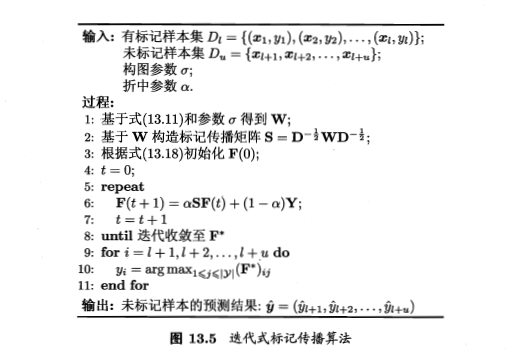

事实上，上图的算法对应于正则化框架

$$\min_{\mathbf{F}}\frac{1}{2}\left(\sum_{i,j=1}^{l+u}(\mathbf{W})_{ij}\lVert\frac{1}{\sqrt{d_i}}\mathbf{F}_i - \frac{1}{\sqrt{d_j}}\mathbf{F}_j\lVert^2\right) + \mu \|\mathbf{F}_i-\mathbf{F}_j\|^2$$

其中$\mu > 0$为正则化参数。当$\mu=\frac{1-\alpha}{\alpha}$时，上式的最优解恰为上述图算法的迭代收敛解$\mathbf{F}^*$

上式右边第二项是迫使学的结果在有标记样本上的预测与真实标记尽可能相同，而第一项则迫使相近样本具有相似的标记，显然，它与式子都是基于半监督学习的基本假设，不同的不同的是式中考虑离散的类别标记，而式子则是考虑输出连续值。

图半监督学习方法在概念上相当清晰，且易于通过对所涉矩阵运算的分析来探索法性质。但此类算法的缺陷也相当明显。首先是在存储开销上，若样本数为$O(m)$，则算法中所涉及的矩阵模型为$O(m^2)$，这使得此类算法很难直接处理大规模数据；另一方面，由于构图过程仅能考虑训练样本集，难以判知新样本在图中的位置，因此，在接收到新样本时，或是将其加入原数据集对图进行重构并重新进行标记传播，或是需引入额外的预测机制，例如将$D_l$和经标记传播后得到标记的$D_u$合并作为训练集，另外训练一个学习器如支持向量机来对新样本进行预测。

#### 5. 基于分歧的方法

与生成方法、半监督SVM、图半监督学习等基于单学习器利用未标记数据不同，基于分歧的方法使用多学习器，而学习器之间的“分歧”对未标记数据的利用至关重要。“协同训练”是此类方法的重要代表，它最初是针对“多视图”数据设计的，因此也被看作“多视图学习”的代表，在介绍协同训练之前，我们先看看什么是多视图数据。

#### 6. 半监督聚类

### 半监督深度学习小结

https://www.zhihu.com/topic/20088404/hot